# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [187]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [188]:
url='http://api.openweathermap.org/data/2.5/weather?'

city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
count=0
set_count=1

print('--------Beginning Data Retrieval-----------')
print('-------------------------------------------')

for city in cities:
    units = 'imperial'
    query_url=f'{url}appid={weather_api_key}&units={units}&q='
    response = requests.get(query_url+city).json()
    #pprint(response.json())
    
    try:
        print(f"Processing Record {count} of Set {set_count} | {city}")
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
             
    except: 
        print('City not found. Skipping...')
        lat.append(np.nan)
        lng.append(np.nan)
        max_temp.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        cloudiness.append(np.nan)
        
    count = count + 1
    if count == 50:
        count = 0
        set_count = set_count + 1

print('-------------------------------------')      
print('-------Data Retrieval Complete-------')
print('-------------------------------------')
        


--------Beginning Data Retrieval-----------
-------------------------------------------
Processing Record 0 of Set 1 | provideniya
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | dickinson
Processing Record 3 of Set 1 | margate
Processing Record 4 of Set 1 | villa corona
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | ucluelet
Processing Record 7 of Set 1 | wellington
Processing Record 8 of Set 1 | kachikau
City not found. Skipping...
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | templemore
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | ojinaga
Processing Record 17 of Set 1 | plouzane
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | atuona

Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | acarau
Processing Record 42 of Set 4 | waw
Processing Record 43 of Set 4 | merrill
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | soligalich
Processing Record 47 of Set 4 | umm durman
City not found. Skipping...
Processing Record 48 of Set 4 | ajdabiya
Processing Record 49 of Set 4 | mareeba
Processing Record 0 of Set 5 | tiksi
Processing Record 1 of Set 5 | picui
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | yarkovo
Processing Record 4 of Set 5 | clyde river
Processing Record 5 of Set 5 | zhenlai
Processing Record 6 of Set 5 | port augusta
Processing Record 7 of Set 5 | victoria
Processing Record 8 of Set 5 | houma
Processing Record 9 of Set 5 | esmeraldas
Processing Record 10 of Set 5 | lokosovo
Processing Record 11 of Set 5 | yellowknife
Processing Record 12 of Set 5 | port elizabeth
Processing Record 13 of Set 5 | ri

Processing Record 31 of Set 8 | san diego de la union
Processing Record 32 of Set 8 | kaoma
Processing Record 33 of Set 8 | wilmington
Processing Record 34 of Set 8 | wodonga
Processing Record 35 of Set 8 | labutta
City not found. Skipping...
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | tomatlan
Processing Record 38 of Set 8 | nata
Processing Record 39 of Set 8 | nome
Processing Record 40 of Set 8 | miedzyrzec podlaski
Processing Record 41 of Set 8 | pilar
Processing Record 42 of Set 8 | celestun
Processing Record 43 of Set 8 | sidney
Processing Record 44 of Set 8 | tutoia
Processing Record 45 of Set 8 | san pedro
Processing Record 46 of Set 8 | aswan
Processing Record 47 of Set 8 | moose factory
Processing Record 48 of Set 8 | richards bay
Processing Record 49 of Set 8 | port blair
Processing Record 0 of Set 9 | maragogi
Processing Record 1 of Set 9 | eyl
Processing Record 2 of Set 9 | bonavista
Processing Record 3 of Set 9 | lompoc
Processing Record 

Processing Record 17 of Set 12 | batticaloa
Processing Record 18 of Set 12 | longlac
City not found. Skipping...
Processing Record 19 of Set 12 | hengyang
Processing Record 20 of Set 12 | hazorasp
Processing Record 21 of Set 12 | kaniama
Processing Record 22 of Set 12 | asyut
Processing Record 23 of Set 12 | mezcala
Processing Record 24 of Set 12 | walvis bay
Processing Record 25 of Set 12 | dujuma
City not found. Skipping...
Processing Record 26 of Set 12 | loukhi
Processing Record 27 of Set 12 | shaunavon
Processing Record 28 of Set 12 | honiara
Processing Record 29 of Set 12 | caravelas
Processing Record 30 of Set 12 | abha
Processing Record 31 of Set 12 | maku
Processing Record 32 of Set 12 | chicama
Processing Record 33 of Set 12 | jiaojiang
Processing Record 34 of Set 12 | candido mendes
Processing Record 35 of Set 12 | tazmalt
Processing Record 36 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 12 | basco
Processing Record 38 of Set 12 | damghan
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [195]:
weather_df = pd.DataFrame({
    'City' : cities,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity': humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date,
    
})

weather_df.to_csv('Output/weather_df.csv')

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,-9.02,84.0,100.0,17.98,RU,1.612068e+09
1,cidreira,-30.1811,-50.2056,74.44,91.0,92.0,6.04,BR,1.612068e+09
2,dickinson,29.4608,-95.0513,68.00,94.0,90.0,4.61,US,1.612068e+09
3,margate,51.3813,1.3862,39.00,61.0,40.0,3.00,GB,1.612068e+09
4,villa corona,20.4167,-103.6833,64.99,27.0,1.0,5.75,MX,1.612068e+09
...,...,...,...,...,...,...,...,...,...
594,vardo,70.3705,31.1107,25.66,96.0,100.0,20.49,NO,1.612068e+09
595,asuncion,-25.3007,-57.6359,75.20,94.0,90.0,23.02,PY,1.612068e+09
596,srednekolymsk,67.4500,153.6833,-35.95,83.0,100.0,6.26,RU,1.612069e+09
597,novaya bryan,51.7159,108.2691,-9.40,54.0,75.0,20.13,RU,1.612069e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. NO NEED, MAX HUMIDITY IS 100%

In [196]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,20.964329,13.427108,47.853051,74.054152,55.821300,8.076787,1.612068e+09
std,33.488871,89.610411,33.488805,19.803299,39.763162,5.855917,9.445266e+01
min,-54.800000,-179.166700,-47.650000,5.000000,0.000000,0.130000,1.612068e+09
25%,-5.746125,-67.653125,26.700000,64.000000,12.000000,3.600000,1.612068e+09
50%,24.927300,20.133300,59.125000,79.000000,75.000000,6.700000,1.612068e+09
75%,50.295650,87.524200,73.400000,88.000000,91.000000,11.335000,1.612069e+09
max,78.218600,179.316700,104.000000,100.000000,100.000000,37.490000,1.612069e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

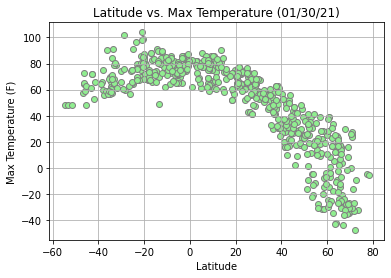

In [197]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor = 'gray',facecolor = 'lightgreen')
plt.title('Latitude vs. Max Temperature (01/30/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Output/Latitude_vs_Max_Temp.png')


In [198]:
print('This analysis shows that cities closer to the equator and in the southern hemisphere, have a much higher maximum temperature than those cities that are not.')


This analysis shows that cities closer to the equator and in the southern hemisphere, have a much higher maximum temperature than those cities that are not.


## Latitude vs. Humidity Plot

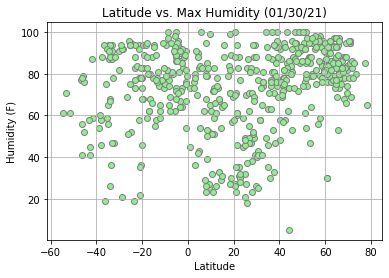

In [199]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor = 'gray',facecolor = 'lightgreen')
plt.title('Latitude vs. Max Humidity (01/30/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (F)')
plt.grid()
plt.savefig('Output/Latitude_vs_Max_Humidity.png')


In [200]:
print('This analysis shows cities in the northern hemisphere a higher amount of humidity.')

This analysis shows cities in the northern hemisphere a higher amount of humidity.


## Latitude vs. Cloudiness Plot

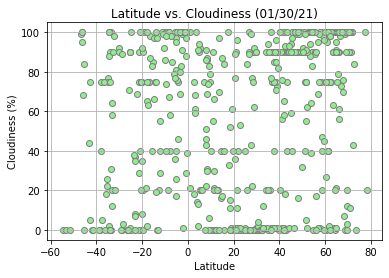

In [201]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor = 'gray',facecolor = 'lightgreen')
plt.title('Latitude vs. Cloudiness (01/30/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Output/Latitude_vs_Cloudiness.png')


In [202]:
print('This analysis shows that cloudiness is not dependent on latitude as the plot is spread evenly.')

This analysis shows that cloudiness is not dependent on latitude as the plot is spread evenly.


## Latitude vs. Wind Speed Plot

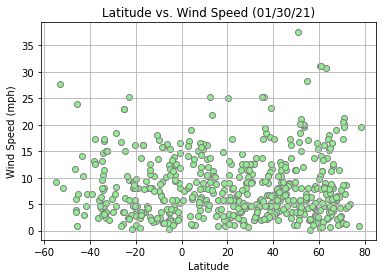

In [203]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolor = 'gray',facecolor = 'lightgreen')
plt.title('Latitude vs. Wind Speed (01/30/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('Output/Latitude_vs_Wind_Speed.png')


In [204]:
print('This analysis shows a majority of cities have a wind speed below 15 mph across all latitude lines.')

This analysis shows a majority of cities have a wind speed below 15 mph across all latitude lines.


## Linear Regression

In [205]:
north_hemisphere=weather_df.loc[weather_df['Lat']>0]
north_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,provideniya,64.3833,-173.3000,-9.02,84.0,100.0,17.98,RU,1.612068e+09
2,dickinson,29.4608,-95.0513,68.00,94.0,90.0,4.61,US,1.612068e+09
3,margate,51.3813,1.3862,39.00,61.0,40.0,3.00,GB,1.612068e+09
4,villa corona,20.4167,-103.6833,64.99,27.0,1.0,5.75,MX,1.612068e+09
6,ucluelet,48.9329,-125.5528,45.00,91.0,100.0,5.01,CA,1.612068e+09
...,...,...,...,...,...,...,...,...,...
591,kedrovyy,56.1667,91.8167,-31.00,75.0,0.0,2.24,RU,1.612069e+09
593,deputatskiy,69.3000,139.9000,-27.44,88.0,100.0,2.55,RU,1.612068e+09
594,vardo,70.3705,31.1107,25.66,96.0,100.0,20.49,NO,1.612068e+09
596,srednekolymsk,67.4500,153.6833,-35.95,83.0,100.0,6.26,RU,1.612069e+09


In [206]:
south_hemisphere=weather_df.loc[weather_df['Lat']<0]
south_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,cidreira,-30.1811,-50.2056,74.44,91.0,92.0,6.04,BR,1.612068e+09
5,ancud,-41.8697,-73.8203,53.01,87.0,0.0,4.61,CL,1.612068e+09
7,wellington,-41.2866,174.7756,66.20,59.0,0.0,6.91,NZ,1.612068e+09
9,airai,-8.9266,125.4092,64.67,100.0,100.0,6.73,TL,1.612068e+09
13,puerto ayora,-0.7393,-90.3518,78.01,91.0,29.0,8.01,EC,1.612068e+09
...,...,...,...,...,...,...,...,...,...
582,chicama,-7.8447,-79.1469,74.08,62.0,58.0,5.73,PE,1.612069e+09
584,candido mendes,-1.4467,-45.7167,75.87,89.0,100.0,3.60,BR,1.612069e+09
592,lufilufi,-13.8745,-171.5986,80.60,89.0,75.0,11.50,WS,1.612069e+09
595,asuncion,-25.3007,-57.6359,75.20,94.0,90.0,23.02,PY,1.612068e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7617985684315892


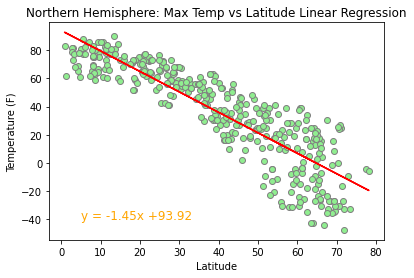

In [207]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors='lightgreen', edgecolors='gray')
plt.title("Northern Hemisphere: Max Temp vs Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(5,-40),fontsize=12,color='orange')
plt.savefig('Output/North_Hemisphere_Max_Temp_vs_Lat-Linear_Regression.png')
print(f'The r-value is: {rvalue**2}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.24345431113074345


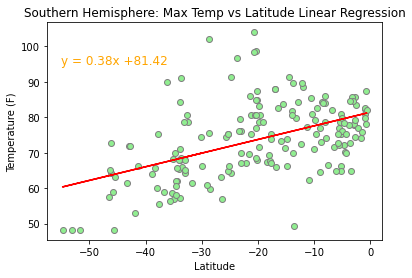

In [208]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors='lightgreen', edgecolors='gray')
plt.title("Southern Hemisphere: Max Temp vs Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-55,95),fontsize=12,color='orange')
plt.savefig('Output/South_Hemisphere_Max_Temp_vs_Lat-Linear_Regression.png')
print(f'The r-value is: {rvalue**2}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2007363207968727


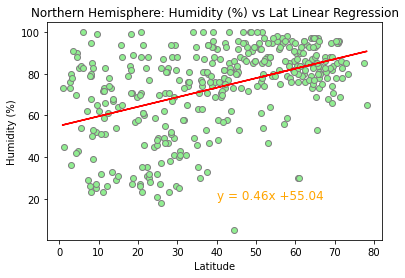

In [209]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors='lightgreen', edgecolors='gray')
plt.title("Northern Hemisphere: Humidity (%) vs Lat Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(40,20),fontsize=12,color='orange')
plt.savefig('Output/North_Hemisphere_Humidity_vs_Lat-Linear_Regression.png')
print(f'The r-value is: {rvalue**2}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0682721358011768


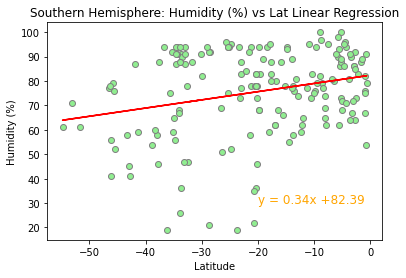

In [210]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors='lightgreen', edgecolors='gray')
plt.title("Southern Hemisphere: Humidity (%) vs Lat Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-20,30),fontsize=12,color='orange')
plt.savefig('Output/South_Hemisphere_Humidity_vs_Lat-Linear_Regression.png')
print(f'The r-value is: {rvalue**2}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.11718100970207271


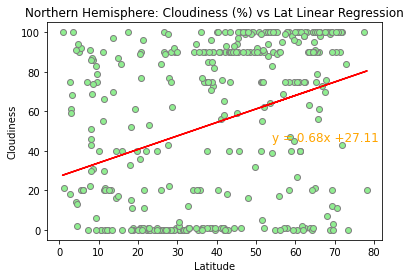

In [211]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors='lightgreen', edgecolors='gray')
plt.title("Northern Hemisphere: Cloudiness (%) vs Lat Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(54,45),fontsize=12,color='orange')
plt.savefig('Output/North_Hemisphere_Cloudiness_vs_Lat-Linear_Regression.png')
print(f'The r-value is: {rvalue**2}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1527068881998776


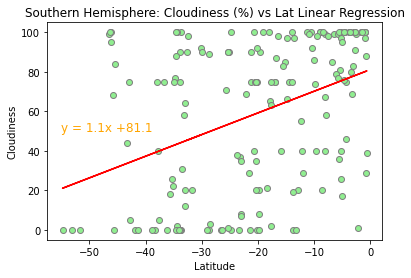

In [212]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors='lightgreen', edgecolors='gray')
plt.title("Southern Hemisphere: Cloudiness (%) vs Lat Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,50),fontsize=12,color='orange')
plt.savefig('Output/South_Hemisphere_Cloudiness_vs_Lat-Linear_Regression.png')
print(f'The r-value is: {rvalue**2}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 7.26076780796043e-05


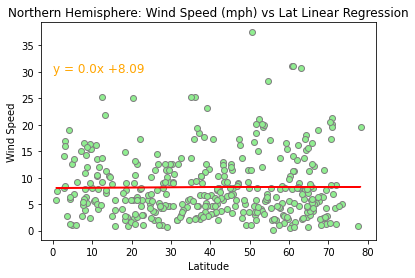

In [213]:
x_axis = north_hemisphere['Lat']
y_axis = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors='lightgreen', edgecolors='gray')
plt.title("Northern Hemisphere: Wind Speed (mph) vs Lat Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0,30),fontsize=12,color='orange')
plt.savefig('Output/North_Hemisphere_Wind_speed_vs_Lat-Linear_Regression.png')
print(f'The r-value is: {rvalue**2}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.018640878045405804


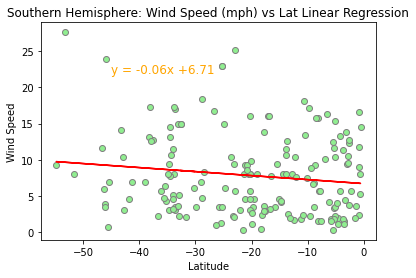

In [214]:
x_axis = south_hemisphere['Lat']
y_axis = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.scatter(x_axis, y_axis, marker="o", facecolors='lightgreen', edgecolors='gray')
plt.title("Southern Hemisphere: Wind Speed (mph) vs Lat Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-45,22),fontsize=12,color='orange')
plt.savefig('Output/South_Hemisphere_Wind_speed_vs_Lat-Linear_Regression.png')
print(f'The r-value is: {rvalue**2}')
plt.show()